In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# What is SPP?
# Graphic: https://oppdthewire.com/wp-content/uploads/2017/09/IND_SPP_SPP_Info-snip.jpg
# https://oppdthewire.com/spp-membership/

### Import Load

See the EIA section for importing load from EIA

In [15]:
# SPP  Hourly Load
# Historical load data rolled up at an hourly level and grouped by Area (legacy BA).
# Monthly format (daily available)
# https://marketplace.spp.org/groups/operational_data
# https://marketplace.spp.org/pages/hourly-load
load202208 = pd.read_csv("HOURLY_LOAD-202208.csv")

In [19]:
load202208

,MarketHour,CSWS,EDE,GRDA,INDN,KACY,KCPL,LES,MPS,NPPD,OKGE,OPPD,SECI,SPRM,SPS,WAUE,WFEC,WR
0,08/01/2022 06:00:00,5921.979,552.789,718.267,144.774,334.646,2165.933,450.939,1167.743,3038.855,4133.017,1725.040,736.784,400.886,4451.515,3311.000,1217.344,4156.282
1,08/01/2022 07:00:00,5676.878,518.736,760.611,134.214,312.163,2039.448,421.817,1092.053,2955.992,3977.195,1628.749,700.359,377.864,4321.825,3246.612,1171.366,3925.043
2,08/01/2022 08:00:00,5487.689,499.554,791.414,126.417,311.814,1930.839,400.730,1040.493,2877.460,3876.880,1544.144,667.656,362.290,4224.715,3208.668,1143.330,3738.987
3,08/01/2022 09:00:00,5388.093,488.896,796.095,123.577,301.093,1865.714,387.193,993.037,2829.621,3826.183,1490.562,653.168,352.197,4158.655,3176.231,1123.487,3634.014
4,08/01/2022 10:00:00,5378.077,493.719,787.370,121.022,303.576,1858.928,382.089,991.326,2820.477,3811.603,1470.734,650.676,353.732,4102.959,3202.621,1114.424,3616.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,09/01/2022 01:00:00,7772.379,844.710,984.804,191.034,363.280,2599.117,619.939,1468.947,3501.208,5709.688,2193.250,932.935,549.751,3971.176,4308.471,1436.407,5399.233
740,09/01/2022 02:00:00,7427.238,808.791,955.567,176.464,354.621,2476.311,597.850,1386.748,3423.472,5511.957,2117.423,890.655,516.126,3917.394,4190.632,1398.288,5123.417
741,09/01/2022 03:00:00,6952.782,741.009,899.568,158.262,333.600,2326.732,564.697,1285.525,3299.299,5225.879,1989.168,870.498,475.247,3700.453,4028.525,1343.675,4793.956
742,09/01/2022 04:00:00,6423.723,679.433,853.791,138.238,314.749,2118.982,506.040,1185.127,3126.090,4870.231,1817.832,813.996,431.061,3570.827,3817.862,1263.726,4370.121


In [23]:
load202208.columns

Index(['MarketHour', ' CSWS', ' EDE', ' GRDA', ' INDN', ' KACY', ' KCPL',
       ' LES', ' MPS', ' NPPD', ' OKGE', ' OPPD', ' SECI', ' SPRM', ' SPS',
       ' WAUE', ' WFEC', ' WR'],
      dtype='object')

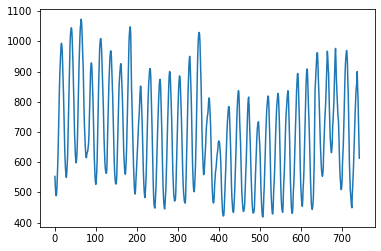

In [25]:

plt.plot(load202208[" EDE"])

See below for importing load from EIA

### Import ACE

In [95]:
# SPP Area Control Error
# Over or under generation compared to scheduled
# https://marketplace.spp.org/pages/ace-chart
_10minACE = pd.read_csv("ACE10-16-22-1047pm/10minACE.csv", names = ['time','ACE'])
# Annoyingly, the current and previous year's ACE files are missing the first 2 weeks of January.

In [96]:
ace_10min_2022=_10minACE

In [97]:
_10minACE

,time,ACE
0,2022-01-14T06:00:00Z,15.9243
1,2022-01-14T06:10:00Z,23.8939
2,2022-01-14T06:20:00Z,305.7813
3,2022-01-14T06:30:00Z,38.4626
4,2022-01-14T06:40:00Z,-15.2098
...,...,...
39595,2022-10-16T04:10:00Z,74.5425
39596,2022-10-16T04:20:00Z,-76.5265
39597,2022-10-16T04:30:00Z,-82.9447
39598,2022-10-16T04:40:00Z,146.3056


In [98]:
_PrevYear10minACE = pd.read_csv("ACE10-16-22-1047pm/PrevYearAce10Min.csv", names = ['time','ACE'])

In [99]:
ace_10min_2021=_PrevYear10minACE

In [105]:
ace_10min_21_22 = pd.concat([ace_10min_2021,ace_10min_2022])
# Data Gap: First two weeks of January 2022
# To do: check for more gaps

In [106]:
ace_10min_21_22

,time,ACE
0,2021-01-14T06:00:00Z,-2.0778
1,2021-01-14T06:10:00Z,-50.3164
2,2021-01-14T06:20:00Z,15.9920
3,2021-01-14T06:30:00Z,22.6456
4,2021-01-14T06:40:00Z,-43.6336
...,...,...
39595,2022-10-16T04:10:00Z,74.5425
39596,2022-10-16T04:20:00Z,-76.5265
39597,2022-10-16T04:30:00Z,-82.9447
39598,2022-10-16T04:40:00Z,146.3056


In [131]:
ace_10min_21_22.columns = ['GMTTime', '10 Min ACE Average']

In [107]:
_1minACE = pd.read_csv("ACE10-16-22-1047pm/1minACE.csv", names = ['time','ACE'])
ace_1min_2022=_1minACE
_PrevYear1minACE = pd.read_csv("ACE10-16-22-1047pm/PrevYearAce1Min.csv", names = ['time','ACE'])
ace_1min_2021=_PrevYear1minACE
ace_1min_21_22 = pd.concat([ace_1min_2021,ace_1min_2022])
# Data Gap: First two weeks of January 2022
# To do: check for more gaps

In [108]:
ace_1min_21_22

,time,ACE
0,2021-01-14T06:00:00Z,-95.8274
1,2021-01-14T06:01:00Z,-169.2718
2,2021-01-14T06:02:00Z,-190.0457
3,2021-01-14T06:03:00Z,-111.5841
4,2021-01-14T06:04:00Z,63.5008
...,...,...
395990,2022-10-16T04:55:00Z,111.4383
395991,2022-10-16T04:56:00Z,110.1949
395992,2022-10-16T04:57:00Z,115.4496
395993,2022-10-16T04:58:00Z,108.1516


In [126]:
ace_1min_21_22

,GMTTime,1 Min ACE Average
0,2021-01-14T06:00:00Z,-95.8274
1,2021-01-14T06:01:00Z,-169.2718
2,2021-01-14T06:02:00Z,-190.0457
3,2021-01-14T06:03:00Z,-111.5841
4,2021-01-14T06:04:00Z,63.5008
...,...,...
395990,2022-10-16T04:55:00Z,111.4383
395991,2022-10-16T04:56:00Z,110.1949
395992,2022-10-16T04:57:00Z,115.4496
395993,2022-10-16T04:58:00Z,108.1516


In [ ]:
# Can download data from FTP: ftp://pubftp.spp.org/Operational_Data/ACE/
# Use Windows file explorer to go to this ftp url.
# Data since 2014
# But missing 2019 files

In [112]:
np.arange(2014,2019)

array([2014, 2015, 2016, 2017, 2018])

In [116]:
list10min_14_18 = []
for year in np.arange(2014,2019):
    list10min_14_18.append(pd.read_csv("ACEftp/" + str(year) + "-10MinACE.csv" ))
ace_10min_14_18 = pd.concat(list10min_14_18)

In [117]:
ace_10min_14_18
# To do: check for data holes, NaNs, etc.

,GMTTime,10 Min ACE Average
0,2014-03-01T06:00:00Z,4.3298
1,2014-03-01T06:10:00Z,-8.0182
2,2014-03-01T06:20:00Z,-8.0188
3,2014-03-01T06:30:00Z,-8.694
4,2014-03-01T06:40:00Z,25.422
...,...,...
49820,2019-01-01T05:10:00Z,116.042
49821,2019-01-01T05:20:00Z,-72.943
49822,2019-01-01T05:30:00Z,35.66
49823,2019-01-01T05:40:00Z,54.891


In [118]:
list1min_14_18 = []
for year in np.arange(2014,2019):
    list1min_14_18.append(pd.read_csv("ACEftp/" + str(year) + "-1MinACE.csv" ))
ace_1min_14_18 = pd.concat(list1min_14_18)

In [119]:
ace_1min_14_18
# To do: check for data holes, NaNs, etc.

,GMTTime,1 Min ACE Average
0,2014-03-01T06:00:00Z,-26.9910
1,2014-03-01T06:01:00Z,-86.1290
2,2014-03-01T06:02:00Z,-95.1770
3,2014-03-01T06:03:00Z,-69.5760
4,2014-03-01T06:04:00Z,-31.9080
...,...,...
497962,2019-01-01T05:55:00Z,123.2900
497963,2019-01-01T05:56:00Z,106.8900
497964,2019-01-01T05:57:00Z,15.2450
497965,2019-01-01T05:58:00Z,-43.5660


In [121]:
ace_10min_2020 = pd.read_csv("ACEftp/2020-10MinACE.csv" )

In [122]:
ace_1min_2020 = pd.read_csv("ACEftp/2020-1MinACE.csv" )

In [130]:
ace_10min_2020.columns

Index(['GMTTime', '10 Min ACE Average'], dtype='object')

In [132]:
ace_10min_14_22 = pd.concat((ace_10min_14_18,ace_10min_2020,ace_10min_21_22))

In [133]:
ace_10min_14_22
# Has data holes: all of 2019, first two weeks of 2021 and 2022.

,GMTTime,10 Min ACE Average
0,2014-03-01T06:00:00Z,4.3298
1,2014-03-01T06:10:00Z,-8.0182
2,2014-03-01T06:20:00Z,-8.0188
3,2014-03-01T06:30:00Z,-8.694
4,2014-03-01T06:40:00Z,25.422
...,...,...
39595,2022-10-16T04:10:00Z,74.5425
39596,2022-10-16T04:20:00Z,-76.5265
39597,2022-10-16T04:30:00Z,-82.9447
39598,2022-10-16T04:40:00Z,146.3056


In [136]:
ace_10min_14_22.to_csv("ace_10min_14_22.csv", index = False)

In [139]:
readcsv_ace_10min_14_22 = pd.read_csv("ace_10min_14_22.csv")
readcsv_ace_10min_14_22

C:\Users\chen5\AppData\Local\Temp\ipykernel_24788\3673595366.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  readcsv_ace_10min_14_22 = pd.read_csv("ace_10min_14_22.csv")


,GMTTime,10 Min ACE Average
0,2014-03-01T06:00:00Z,4.3298
1,2014-03-01T06:10:00Z,-8.0182
2,2014-03-01T06:20:00Z,-8.0188
3,2014-03-01T06:30:00Z,-8.694
4,2014-03-01T06:40:00Z,25.422
...,...,...
395866,2022-10-16T04:10:00Z,74.5425
395867,2022-10-16T04:20:00Z,-76.5265
395868,2022-10-16T04:30:00Z,-82.9447
395869,2022-10-16T04:40:00Z,146.3056


In [143]:
ace_1min_14_22 = pd.concat((ace_1min_14_18,ace_1min_2020,ace_1min_21_22))

In [145]:
readcsv_ace_1min_14_22 = pd.read_csv("ace_1min_14_22.csv")
readcsv_ace_1min_14_22

,GMTTime,1 Min ACE Average
0,2014-03-01T06:00:00Z,-26.9910
1,2014-03-01T06:01:00Z,-86.1290
2,2014-03-01T06:02:00Z,-95.1770
3,2014-03-01T06:03:00Z,-69.5760
4,2014-03-01T06:04:00Z,-31.9080
...,...,...
3805682,2022-10-16T04:55:00Z,111.4383
3805683,2022-10-16T04:56:00Z,110.1949
3805684,2022-10-16T04:57:00Z,115.4496
3805685,2022-10-16T04:58:00Z,108.1516


In [144]:
ace_1min_14_22.to_csv("ace_1min_14_22.csv", index = False)

In [135]:
ace_1min_14_22

,GMTTime,1 Min ACE Average
0,2014-03-01T06:00:00Z,-26.9910
1,2014-03-01T06:01:00Z,-86.1290
2,2014-03-01T06:02:00Z,-95.1770
3,2014-03-01T06:03:00Z,-69.5760
4,2014-03-01T06:04:00Z,-31.9080
...,...,...
395990,2022-10-16T04:55:00Z,111.4383
395991,2022-10-16T04:56:00Z,110.1949
395992,2022-10-16T04:57:00Z,115.4496
395993,2022-10-16T04:58:00Z,108.1516


In [ ]:
# Other ISO ACE
# California http://www.caiso.com/Documents/HistoricalACE.zip - contains 2021 data
# PJM https://dataminer2.pjm.com/feed/area_control_error/definition - need to use API
# PJM https://www.pjm.com/markets-and-operations/etools/oasis/system-information/historical-area-control-error-data.aspx
# PJM https://dataviewer.pjm.com/dataviewer/pages/public/ace.jsf

In [4]:
# https://marketplace.spp.org/pages/generation-mix-rolling-365
# Generation Mix Rolling 365 for 2022-10-06 01:00:00 (Central Time)
# Graphic view (mw) of generation mix by fuel type for the past 365 days
GenMix365 = pd.read_csv("GenMix365.csv")

In [13]:
GenMix365
# Seems to be 5 min

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
0,2021-10-06T10:05:00Z,7941.1,3006.6,0.0,6.1,1.8,633.9,2535.5,401.4,0.0,...,0.0,0.0,8.1,0.0,7873.2,0.0,0.0,0.0,30.8,23513.258
1,2021-10-06T10:10:00Z,7986.9,3018.2,0.0,6.2,1.8,635.0,2630.9,488.5,0.0,...,0.0,0.0,8.1,0.0,7711.0,0.0,0.0,0.0,30.7,23610.196
2,2021-10-06T10:15:00Z,8093.9,3001.2,0.0,6.3,1.8,635.3,2592.7,520.3,0.0,...,0.0,0.0,8.2,0.0,7714.5,0.0,0.0,0.0,30.8,23669.651
3,2021-10-06T10:20:00Z,8162.4,3007.1,0.0,6.3,1.9,634.8,2627.5,537.7,0.0,...,0.0,0.0,8.1,0.0,7660.5,0.0,0.0,0.0,30.8,23720.972
4,2021-10-06T10:25:00Z,8251.1,3029.8,0.0,6.3,1.9,637.0,2689.0,550.8,0.0,...,0.0,0.0,8.1,0.0,7579.0,0.0,0.0,0.0,30.8,23820.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2022-10-06T09:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105116,2022-10-06T09:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105117,2022-10-06T09:50:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105118,2022-10-06T09:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
GenMix365[GenMix365.isna().any(axis=1)]


,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
735,2021-10-08T23:20:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3817,2021-10-19T16:10:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3912,2021-10-20T00:05:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4131,2021-10-20T18:20:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4135,2021-10-20T18:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2022-10-06T09:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105116,2022-10-06T09:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105117,2022-10-06T09:50:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105118,2022-10-06T09:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Can download from FTP: ftp://pubftp.spp.org/Operational_Data/GEN_MIX/ - accessed 10/16/22
# different formats: 2011 to 2015, 2016, 2017, 2018 on


In [147]:
year = 2021
pd.read_csv("genmixftp/GenMix_" + str(year) + ".csv" )

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
0,2021-01-01T06:00:00Z,6155.5,4181.7,0.0,0.0,35.0,284.5,3898.3,906.5,0.0,...,0.0,0.0,10.6,0.0,13588.2,0.0,0.0,0.0,28.6,29536.106
1,2021-01-01T06:05:00Z,6192.5,4226.2,0.0,0.0,34.7,286.1,3856.0,926.0,0.0,...,0.0,0.0,10.9,0.0,13533.1,0.0,0.0,0.0,28.4,29527.813
2,2021-01-01T06:10:00Z,6238.2,4232.6,0.0,0.0,33.9,285.1,3901.9,884.2,0.0,...,0.0,0.0,10.8,0.0,13436.3,0.0,0.0,0.0,28.5,29463.581
3,2021-01-01T06:15:00Z,6279.4,4265.1,0.0,0.0,33.5,283.5,3865.9,895.4,0.0,...,0.0,0.0,10.7,0.0,13367.0,0.0,0.0,0.0,28.5,29364.982
4,2021-01-01T06:20:00Z,6303.1,4249.4,0.0,0.0,33.6,285.9,3826.9,874.9,0.0,...,0.0,0.0,11.1,0.0,13367.0,0.0,0.0,0.0,28.4,29367.888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105116,2022-01-01T05:40:00Z,2426.2,4388.3,0.0,0.0,54.7,363.6,1681.9,708.4,0.0,...,0.0,0.0,12.5,0.0,17417.3,0.0,0.0,0.0,14.1,27734.387
105117,2022-01-01T05:45:00Z,2412.7,4379.4,0.0,0.0,55.1,364.5,1678.7,694.9,0.0,...,0.0,0.0,12.7,0.0,17356.9,0.0,0.0,0.0,14.4,27716.397
105118,2022-01-01T05:50:00Z,2416.4,4381.6,0.0,0.0,54.7,364.2,1665.9,708.3,0.0,...,0.0,0.0,12.8,0.0,17245.5,0.0,0.0,0.0,13.9,27688.465
105119,2022-01-01T05:55:00Z,2399.8,4331.8,0.0,0.0,54.1,363.5,1660.7,702.4,0.0,...,0.0,0.0,12.6,0.0,17215.5,0.0,0.0,0.0,14.3,27802.210


In [163]:
listGenMix_2018_2021 = []
GenMix_2018 = pd.read_csv("genmixftp/GenMix_2018.csv" )
GenMix_2018 = GenMix_2018.rename(columns = {' Gas Self':' Natural Gas Self',' Average Actual Load':' Load'})
listGenMix_2018_2021.append(GenMix_2018)

for year in np.arange(2020,2022):
    listGenMix_2018_2021.append(pd.read_csv("genmixftp/GenMix_" + str(year) + ".csv" ).rename(columns = {' Gas Self':' Natural Gas Self'}))
listGenMix_2018_2021.append(pd.read_csv("genmixftp/GenMixYTD.csv" ))

GenMix_2018_2022 = pd.concat(listGenMix_2018_2021)

In [164]:
GenMix_2018_2022

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Solar Self,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83132,2022-10-16T21:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83133,2022-10-16T21:45:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83134,2022-10-16T21:50:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83135,2022-10-16T21:55:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
GenMix_2018_2022.columns

Index(['GMT MKT Interval', ' Coal Market', ' Coal Self',
       ' Diesel Fuel Oil Market', ' Diesel Fuel Oil Self', ' Hydro Market',
       ' Hydro Self', ' Natural Gas Market', ' Natural Gas Self',
       ' Nuclear Market', ' Nuclear Self', ' Solar Market', ' Solar Self',
       ' Waste Disposal Services Market', ' Waste Disposal Services Self',
       ' Wind Market', ' Wind Self', ' Waste Heat Market', ' Waste Heat Self',
       ' Other Market', ' Other Self', ' Load'],
      dtype='object')

In [166]:
GenMix_2018_2022.to_csv("GenMix_2018_2022.csv", index=False)

In [167]:
readcsv_GenMix_2018_2022=pd.read_csv("GenMix_2018_2022.csv")

### EIA data (load)

In this section, I import a large xlsx from EIA that contains hourly BA load data (also has generation and interchange data).

This is an alternate source for SPP loads.

In [ ]:
# Data API https://www.eia.gov/opendata/ 
# grid monitor https://www.eia.gov/electricity/gridmonitor/dashboard/electric_overview/US48/US48
    # Click download data, balancing authority files
    # https://www.eia.gov/electricity/gridmonitor/knownissues/xls/SWPP.xlsx - Acessed 10/16/22 9:18pm

# about how EIA collects data, https://www.eia.gov/electricity/gridmonitor/about

# https://www.eia.gov/opendata/v1/qb.php?category=2123635

In [ ]:
# https://www.eia.gov/electricity/gridmonitor/knownissues/xls/SWPP.xlsx - Acessed 10/16/22 9:18pm


In [4]:
SWPP_EIA = pd.read_excel("SWPP.xlsx")

In [7]:
SWPP_EIA

,BA,UTC time,Local date,Hour,Local time,Time zone,Generation only?,DF,D,NG,...,Subregion KCPL,Subregion LES,Subregion NPPD,Subregion OKGE,Subregion OPPD,Subregion SPS,Subregion SECI,Subregion WR,Subregion WAUE,Subregion WFEC
0,SWPP,2015-07-01 06:00:00,2015-07-01,1,2015-07-01 01:00:00,Central,N,28673.0,28891.0,28286.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SWPP,2015-07-01 07:00:00,2015-07-01,2,2015-07-01 02:00:00,Central,N,27170.0,27413.0,26897.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SWPP,2015-07-01 08:00:00,2015-07-01,3,2015-07-01 03:00:00,Central,N,26041.0,26291.0,25632.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SWPP,2015-07-01 09:00:00,2015-07-01,4,2015-07-01 04:00:00,Central,N,25380.0,25582.0,24964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SWPP,2015-07-01 10:00:00,2015-07-01,5,2015-07-01 05:00:00,Central,N,25214.0,25395.0,24830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63955,SWPP,2022-10-17 01:00:00,2022-10-16,20,2022-10-16 20:00:00,Central,N,29048.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63956,SWPP,2022-10-17 02:00:00,2022-10-16,21,2022-10-16 21:00:00,Central,N,28779.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63957,SWPP,2022-10-17 03:00:00,2022-10-16,22,2022-10-16 22:00:00,Central,N,27772.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63958,SWPP,2022-10-17 04:00:00,2022-10-16,23,2022-10-16 23:00:00,Central,N,26374.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
SWPP_EIA.columns

Index(['BA', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
       'Generation only?', 'DF', 'D', 'NG', 'TI', 'Imputed D', 'Imputed NG',
       'Imputed TI', 'Adjusted D', 'Adjusted NG', 'Adjusted TI', 'NG: COL',
       'NG: NG', 'NG: NUC', 'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND',
       'NG: OTH', 'NG: UNK', 'Imputed COL Gen', 'Imputed NG Gen',
       'Imputed NUC Gen', 'Imputed OIL Gen', 'Imputed WAT Gen',
       'Imputed SUN Gen', 'Imputed WND Gen', 'Imputed OTH Gen',
       'Imputed UNK Gen', 'Adjusted COL Gen', 'Adjusted NG Gen',
       'Adjusted NUC Gen', 'Adjusted OIL Gen', 'Adjusted WAT Gen',
       'Adjusted SUN Gen', 'Adjusted WND Gen', 'Adjusted OTH Gen',
       'Adjusted UNK Gen', 'AECI', 'EPE', 'ERCO', 'MISO', 'PNM', 'PSCO', 'SPA',
       'SPC', 'WACM', 'WAUE', 'WAUW', 'Subregion CSWS', 'Subregion SPRM',
       'Subregion EDE', 'Subregion GRDA', 'Subregion INDN', 'Subregion MPS',
       'Subregion KACY', 'Subregion KCPL', 'Subregion LES', 'Subregion NPPD',

In [26]:
# DF: Demand forecast
# D: Demand (total SPP demand)
# NG: Net generation
# TI: total interchange

In [22]:
time_cols = list(SWPP_EIA.columns[1:6].values)

In [24]:
time_cols

list

In [15]:
# https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
subregion_cols = [col for col in SWPP_EIA.columns if "Subregion" in col]

In [17]:
type(subregion_cols)

list

In [27]:
cols_to_get = time_cols + ['D'] + subregion_cols

In [29]:
load_spp_eia = SWPP_EIA[cols_to_get]

In [ ]:
# Subregion load data starts 31Aug2018 6:00:00

# Data gaps from 12Jun2019 6:00:00 - 13Jun2019 5:00:00
# 14Jun2019 6:00:00 - 15Jun2019 5:00:00
# 19Jun2019 6:00:00 - 21Jun2019 5:00:00

# start from 21Jun2019 6:00:00, end 16Oct2022 5:00:00
# 3 years 5 months
# 34826 63937 - rows in excel
# -2 for header and 0 indexing
# 34824:63936


In [38]:
load_spp_eia_Jun19_Oct22 = load_spp_eia[34824:63936]

In [39]:
load_spp_eia_Jun19_Oct22

,UTC time,Local date,Hour,Local time,Time zone,D,Subregion CSWS,Subregion SPRM,Subregion EDE,Subregion GRDA,...,Subregion KCPL,Subregion LES,Subregion NPPD,Subregion OKGE,Subregion OPPD,Subregion SPS,Subregion SECI,Subregion WR,Subregion WAUE,Subregion WFEC
34824,2019-06-21 06:00:00,2019-06-21,1,2019-06-21 01:00:00,Central,31379.0,6147.0,386.0,586.0,772.0,...,1938.0,372.0,1553.0,4518.0,1320.0,3893.0,687.0,3830.0,2814.0,1158.0
34825,2019-06-21 07:00:00,2019-06-21,2,2019-06-21 02:00:00,Central,29906.0,5860.0,360.0,552.0,754.0,...,1805.0,346.0,1484.0,4318.0,1247.0,3736.0,654.0,3648.0,2728.0,1108.0
34826,2019-06-21 08:00:00,2019-06-21,3,2019-06-21 03:00:00,Central,28954.0,5654.0,347.0,532.0,752.0,...,1716.0,330.0,1431.0,4185.0,1209.0,3614.0,633.0,3518.0,2696.0,1098.0
34827,2019-06-21 09:00:00,2019-06-21,4,2019-06-21 04:00:00,Central,28332.0,5536.0,338.0,524.0,746.0,...,1668.0,318.0,1395.0,4063.0,1190.0,3551.0,614.0,3437.0,2665.0,1080.0
34828,2019-06-21 10:00:00,2019-06-21,5,2019-06-21 05:00:00,Central,28189.0,5490.0,341.0,526.0,752.0,...,1663.0,305.0,1395.0,4050.0,1187.0,3510.0,607.0,3424.0,2663.0,1072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63931,2022-10-16 01:00:00,2022-10-15,20,2022-10-15 20:00:00,Central,30570.0,5853.0,341.0,509.0,815.0,...,1504.0,325.0,1773.0,4349.0,1282.0,3703.0,638.0,3263.0,3825.0,1206.0
63932,2022-10-16 02:00:00,2022-10-15,21,2022-10-15 21:00:00,Central,29685.0,5535.0,327.0,491.0,828.0,...,1470.0,316.0,1740.0,4195.0,1251.0,3617.0,624.0,3177.0,3787.0,1166.0
63933,2022-10-16 03:00:00,2022-10-15,22,2022-10-15 22:00:00,Central,28651.0,5233.0,312.0,473.0,828.0,...,1428.0,302.0,1673.0,4017.0,1209.0,3511.0,621.0,3072.0,3731.0,1120.0
63934,2022-10-16 04:00:00,2022-10-15,23,2022-10-15 23:00:00,Central,27434.0,4925.0,297.0,448.0,810.0,...,1373.0,289.0,1634.0,3764.0,1168.0,3432.0,599.0,2943.0,3607.0,1061.0


In [45]:
# Check NaN
# https://datatofish.com/check-nan-pandas-dataframe/
#df.isnull().values.any()
load_spp_eia_Jun19_Oct22.isnull().sum().sum()

0

In [44]:
load_spp_eia_Jun19_Oct22.isnull().values.any()

False

In [52]:
# Remove 'Subregion ' from column header
# https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas
#df.columns = 
load_spp_eia_Jun19_Oct22.columns = load_spp_eia_Jun19_Oct22.columns.str.removeprefix('Subregion ')  # strip suffix at the right end only.


In [53]:
load_spp_eia_Jun19_Oct22

,UTC time,Local date,Hour,Local time,Time zone,D,CSWS,SPRM,EDE,GRDA,...,KCPL,LES,NPPD,OKGE,OPPD,SPS,SECI,WR,WAUE,WFEC
34824,2019-06-21 06:00:00,2019-06-21,1,2019-06-21 01:00:00,Central,31379.0,6147.0,386.0,586.0,772.0,...,1938.0,372.0,1553.0,4518.0,1320.0,3893.0,687.0,3830.0,2814.0,1158.0
34825,2019-06-21 07:00:00,2019-06-21,2,2019-06-21 02:00:00,Central,29906.0,5860.0,360.0,552.0,754.0,...,1805.0,346.0,1484.0,4318.0,1247.0,3736.0,654.0,3648.0,2728.0,1108.0
34826,2019-06-21 08:00:00,2019-06-21,3,2019-06-21 03:00:00,Central,28954.0,5654.0,347.0,532.0,752.0,...,1716.0,330.0,1431.0,4185.0,1209.0,3614.0,633.0,3518.0,2696.0,1098.0
34827,2019-06-21 09:00:00,2019-06-21,4,2019-06-21 04:00:00,Central,28332.0,5536.0,338.0,524.0,746.0,...,1668.0,318.0,1395.0,4063.0,1190.0,3551.0,614.0,3437.0,2665.0,1080.0
34828,2019-06-21 10:00:00,2019-06-21,5,2019-06-21 05:00:00,Central,28189.0,5490.0,341.0,526.0,752.0,...,1663.0,305.0,1395.0,4050.0,1187.0,3510.0,607.0,3424.0,2663.0,1072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63931,2022-10-16 01:00:00,2022-10-15,20,2022-10-15 20:00:00,Central,30570.0,5853.0,341.0,509.0,815.0,...,1504.0,325.0,1773.0,4349.0,1282.0,3703.0,638.0,3263.0,3825.0,1206.0
63932,2022-10-16 02:00:00,2022-10-15,21,2022-10-15 21:00:00,Central,29685.0,5535.0,327.0,491.0,828.0,...,1470.0,316.0,1740.0,4195.0,1251.0,3617.0,624.0,3177.0,3787.0,1166.0
63933,2022-10-16 03:00:00,2022-10-15,22,2022-10-15 22:00:00,Central,28651.0,5233.0,312.0,473.0,828.0,...,1428.0,302.0,1673.0,4017.0,1209.0,3511.0,621.0,3072.0,3731.0,1120.0
63934,2022-10-16 04:00:00,2022-10-15,23,2022-10-15 23:00:00,Central,27434.0,4925.0,297.0,448.0,810.0,...,1373.0,289.0,1634.0,3764.0,1168.0,3432.0,599.0,2943.0,3607.0,1061.0


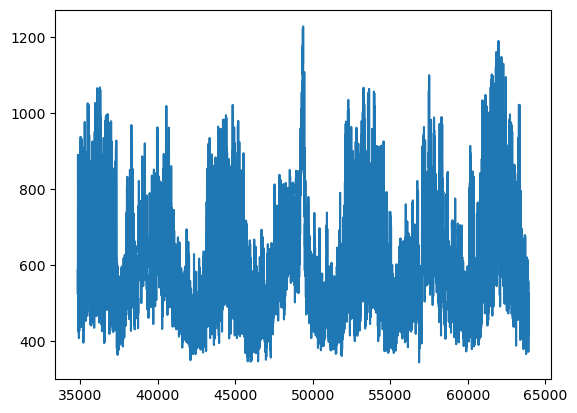

In [62]:
plt.plot(load_spp_eia_Jun19_Oct22['EDE'])

In [ ]:
# /end preprocess SPP Load data from EIA

In [54]:
# save as file
load_spp_eia_Jun19_Oct22.to_csv("load_spp_eia_Jun19_Oct22.csv")

In [55]:
load_data = pd.read_csv("load_spp_eia_Jun19_Oct22.csv")

In [59]:
load_data

,Unnamed: 0,UTC time,Local date,Hour,Local time,Time zone,D,CSWS,SPRM,EDE,...,KCPL,LES,NPPD,OKGE,OPPD,SPS,SECI,WR,WAUE,WFEC
0,34824,2019-06-21 06:00:00,2019-06-21,1,2019-06-21 01:00:00,Central,31379.0,6147.0,386.0,586.0,...,1938.0,372.0,1553.0,4518.0,1320.0,3893.0,687.0,3830.0,2814.0,1158.0
1,34825,2019-06-21 07:00:00,2019-06-21,2,2019-06-21 02:00:00,Central,29906.0,5860.0,360.0,552.0,...,1805.0,346.0,1484.0,4318.0,1247.0,3736.0,654.0,3648.0,2728.0,1108.0
2,34826,2019-06-21 08:00:00,2019-06-21,3,2019-06-21 03:00:00,Central,28954.0,5654.0,347.0,532.0,...,1716.0,330.0,1431.0,4185.0,1209.0,3614.0,633.0,3518.0,2696.0,1098.0
3,34827,2019-06-21 09:00:00,2019-06-21,4,2019-06-21 04:00:00,Central,28332.0,5536.0,338.0,524.0,...,1668.0,318.0,1395.0,4063.0,1190.0,3551.0,614.0,3437.0,2665.0,1080.0
4,34828,2019-06-21 10:00:00,2019-06-21,5,2019-06-21 05:00:00,Central,28189.0,5490.0,341.0,526.0,...,1663.0,305.0,1395.0,4050.0,1187.0,3510.0,607.0,3424.0,2663.0,1072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29107,63931,2022-10-16 01:00:00,2022-10-15,20,2022-10-15 20:00:00,Central,30570.0,5853.0,341.0,509.0,...,1504.0,325.0,1773.0,4349.0,1282.0,3703.0,638.0,3263.0,3825.0,1206.0
29108,63932,2022-10-16 02:00:00,2022-10-15,21,2022-10-15 21:00:00,Central,29685.0,5535.0,327.0,491.0,...,1470.0,316.0,1740.0,4195.0,1251.0,3617.0,624.0,3177.0,3787.0,1166.0
29109,63933,2022-10-16 03:00:00,2022-10-15,22,2022-10-15 22:00:00,Central,28651.0,5233.0,312.0,473.0,...,1428.0,302.0,1673.0,4017.0,1209.0,3511.0,621.0,3072.0,3731.0,1120.0
29110,63934,2022-10-16 04:00:00,2022-10-15,23,2022-10-15 23:00:00,Central,27434.0,4925.0,297.0,448.0,...,1373.0,289.0,1634.0,3764.0,1168.0,3432.0,599.0,2943.0,3607.0,1061.0


In [58]:
load_data.columns

Index(['Unnamed: 0', 'UTC time', 'Local date', 'Hour', 'Local time',
       'Time zone', 'D', 'CSWS', 'SPRM', 'EDE', 'GRDA', 'INDN', 'MPS', 'KACY',
       'KCPL', 'LES', 'NPPD', 'OKGE', 'OPPD', 'SPS', 'SECI', 'WR', 'WAUE',
       'WFEC'],
      dtype='object')

In [87]:
ba_columns = ['CSWS', 'SPRM', 'EDE', 'GRDA', 'INDN', 'MPS', 'KACY',
       'KCPL', 'LES', 'NPPD', 'OKGE', 'OPPD', 'SPS', 'SECI', 'WR', 'WAUE',
       'WFEC']

In [84]:
# Total load D is the sume of the BA loads.
max(load_data["D"] - load_data[['CSWS', 'SPRM', 'EDE', 'GRDA', 'INDN', 'MPS', 'KACY',
       'KCPL', 'LES', 'NPPD', 'OKGE', 'OPPD', 'SPS', 'SECI', 'WR', 'WAUE',
       'WFEC']].sum(axis=1))

19.0